<a href="https://colab.research.google.com/github/yaolihua081/AIG_PC/blob/main/USACovid2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#week 4 HW

from nltk.corpus import stopwords 

import seaborn as sns

import seaborn as sns
import altair as alt

import matplotlib.pyplot as plt
import hashlib
import matplotlib.style as style
style.use('fivethirtyeight')
import re, numpy as np, pandas as pd
np.random.seed(400)
#https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm, united weekly death
#https://data.cdc.gov/NCHS/Weekly-counts-of-death-by-jurisdiction-and-cause-o/u6jv-9ijr/
#https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days

#https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
#https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku
#https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W/vsak-wrfu

In [3]:
#!pip install kaggle
from google.colab import files
files.upload()

Saving United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv to United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv


{'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv': b'submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths\n09/01/2021,ND,118491,107475,11016,536,66,1562,,,1,0,09/02/2021 01:49:05 PM,Agree,Not agree\n07/14/2020,CA,336447,336447,0,7285,0,7039,7039,0,25,0,07/16/2020 12:00:00 AM,Agree,Agree\n02/02/2021,IL,1130917,1130917,0,2304,0,21336,19306,2030,63,16,02/03/2021 02:55:58 PM,Agree,Agree\n09/19/2021,DE,128253,117969,10284,450,36,1920,1756,164,0,0,09/20/2021 01:47:59 PM,Agree,Agree\n02/02/2021,MS,280182,176228,103954,1059,559,6730,4739,1991,13,7,02/04/2021 12:00:00 AM,Agree,Agree\n05/03/2020,NH,2518,,,89,0,86,,,2,0,05/04/2020 10:49:24 PM,Not agree,Not agree\n05/15/2021,NV,320719,320719,0,180,0,5530,,,0,0,05/16/2021 01:46:12 PM,Agree,\n05/17/2021,IN,735999,,,537,0,13460,13044,416,6,0,05/17/2021 12:00:00 AM,Not agree,Agree\n02/26/2021,AL,492393,388404,103989,903,256,

In [4]:
Death_By_Sex_Age=pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv') #11/10/21
Death_ByWeek=pd.read_csv('Provisional_COVID-19_Deaths_by_Week__Sex__and_Age.csv')#11/10/21

In [5]:
United_States_Covid=pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv') #11/15/2021

In [6]:
Death_By_Sex_Age.head()
#Death_ByWeek

Data As Of  Start Date  ... Pneumonia, Influenza, or COVID-19 Deaths Footnote
0  11/10/2021  01/01/2020  ...                                1055133.0      NaN
1  11/10/2021  01/01/2020  ...                                    530.0      NaN
2  11/10/2021  01/01/2020  ...                                   1715.0      NaN
3  11/10/2021  01/01/2020  ...                                    328.0      NaN
4  11/10/2021  01/01/2020  ...                                    527.0      NaN

[5 rows x 16 columns]

In [7]:
United_States_Covid.head()

submission_date state  ...  consent_cases  consent_deaths
0      09/01/2021    ND  ...          Agree       Not agree
1      07/14/2020    CA  ...          Agree           Agree
2      02/02/2021    IL  ...          Agree           Agree
3      09/19/2021    DE  ...          Agree           Agree
4      02/02/2021    MS  ...          Agree           Agree

[5 rows x 15 columns]

In [6]:
United_States_Covid['year']=pd.DatetimeIndex(United_States_Covid['submission_date']).year

In [7]:
United_States_Covid['year'].unique()

array([2021, 2020])

In [7]:
Y=2020
filter=United_States_Covid['year']==Y
United_States_Covid_2020=United_States_Covid[filter]

United_States_Covid_2020['month']=pd.DatetimeIndex(United_States_Covid_2020['submission_date']).month

state_deaths_sum=United_States_Covid_2020.groupby('state')['new_death'].sum()
state_name=state_deaths_sum.index
#state_sum[state_name[1]]
#State monthly cases
state_month_death_sum=United_States_Covid_2020.groupby(['state','month'])['new_death'].sum()

temp=pd.DataFrame(state_month_death_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(state_month_death_sum.values)],axis=1).reindex(temp.index)
temp.columns=['state','month','total_deaths']
state_month_death_covid_2020=temp
state_month_death_covid_2020

state_month_case_sum=United_States_Covid_2020.groupby(['state','month'])['new_case'].sum()

temp=pd.DataFrame(state_month_case_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(state_month_case_sum.values)],axis=1).reindex(temp.index)
temp.columns=['state','month','total_cases']
state_month_case_covid_2020=temp
state_month_case_covid_2020
state_month_case_covid_2020['total_cases_per_ten_thousand']=state_month_case_covid_2020['total_cases']/10000

state_month_covid_2020=pd.concat([state_month_case_covid_2020,pd.DataFrame(state_month_death_covid_2020['total_deaths'])],axis=1).reindex(state_month_case_covid_2020.index)
state_month_covid_2020
pd.DataFrame(state_month_covid_2020).to_csv('state_month_covid_2020.csv')

tot_case_cut=np.sort(state_deaths_sum)[-6] #18948668
filter=state_deaths_sum >tot_case_cut
top_5_state=state_deaths_sum[filter]
filter1 = state_month_covid_2020['state'].apply(lambda x: x in top_5_state)
top_5_state_data_2020=state_month_covid_2020[filter1]
top_5_state_data_2020
pd.DataFrame(top_5_state_data_2020).to_csv('top_5_state_data_2020.csv')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
Y=2021
filter=United_States_Covid['year']==Y
United_States_Covid_2021=United_States_Covid[filter]

United_States_Covid_2021['month']=pd.DatetimeIndex(United_States_Covid_2021['submission_date']).month

state_deaths_sum=United_States_Covid_2021.groupby('state')['new_death'].sum()
state_name=state_deaths_sum.index
#state_sum[state_name[1]]
#State monthly cases
state_month_death_sum=United_States_Covid_2021.groupby(['state','month'])['new_death'].sum()

temp=pd.DataFrame(state_month_death_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(state_month_death_sum.values)],axis=1).reindex(temp.index)
temp.columns=['state','month','total_deaths']
state_month_death_covid_2021=temp
state_month_death_covid_2021

state_month_case_sum=United_States_Covid_2021.groupby(['state','month'])['new_case'].sum()

temp=pd.DataFrame(state_month_case_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(state_month_case_sum.values)],axis=1).reindex(temp.index)
temp.columns=['state','month','total_cases']
state_month_case_covid_2021=temp
state_month_case_covid_2021
state_month_case_covid_2021['total_cases_per_ten_thousand']=state_month_case_covid_2021['total_cases']/10000

state_month_covid_2021=pd.concat([state_month_case_covid_2021,pd.DataFrame(state_month_death_covid_2021['total_deaths'])],axis=1).reindex(state_month_case_covid_2021.index)
state_month_covid_2021
pd.DataFrame(state_month_covid_2021).to_csv('state_month_covid_2021.csv')

tot_case_cut=np.sort(state_deaths_sum)[-6] #18948668
filter=state_deaths_sum >tot_case_cut
top_5_state=state_deaths_sum[filter]
filter1 = state_month_covid_2021['state'].apply(lambda x: x in top_5_state)
top_5_state_data_2021=state_month_covid_2021[filter1]
top_5_state_data_2021
pd.DataFrame(top_5_state_data_2021).to_csv('top_5_state_data_2021.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
state_chart=alt.Chart(state_month_covid_2021,title="Total Covid-19 Cases for Each Month in 2021").mark_bar().encode(
    x='month:O',
    y='total_cases:Q',
    color='total_deaths:Q',
    tooltip='state:N'
#).interactive().to_html()
).interactive()
state_chart
#state_chart.save('state_covid_chart.html')

#from google.colab import files
#files.download('state_covid_chart.html')

alt.Chart(...)

In [10]:
state_chart

alt.Chart(...)

In [44]:
state_chart=alt.Chart(top_5_state_data_2021,title="Top 5 State Total Covid-19 Cases for Each Month in 2021").mark_bar().encode(
    x='month:O',
    y='total_cases:Q',
    color='total_deaths:Q',
    tooltip='state:N'
#).interactive().to_html()
).interactive()
state_chart
#state_chart.save('state_covid_chart.html')

#from google.colab import files
#files.download('state_covid_chart.html')

alt.Chart(...)

In [ ]:
top_5_state_data

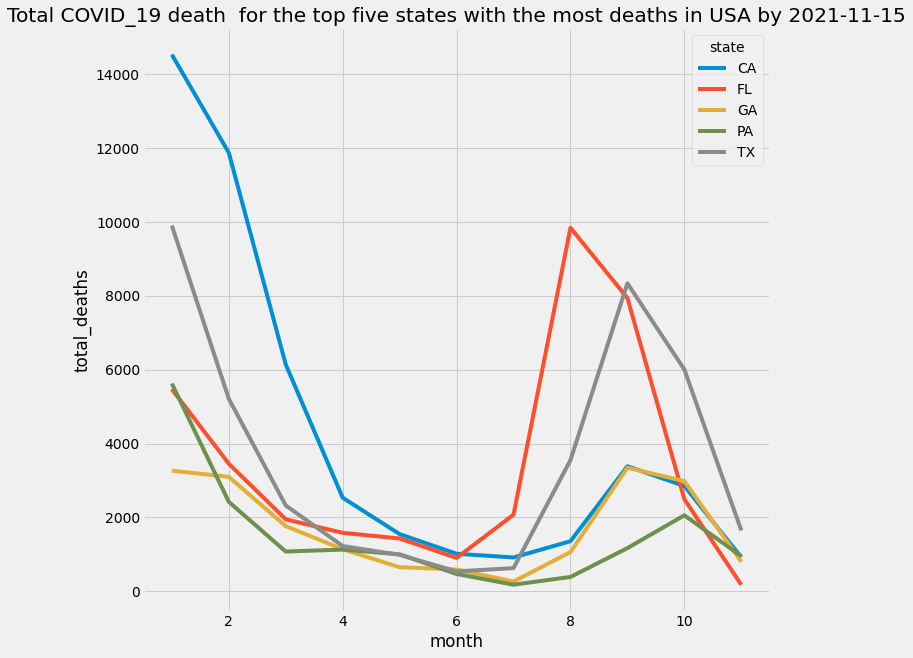

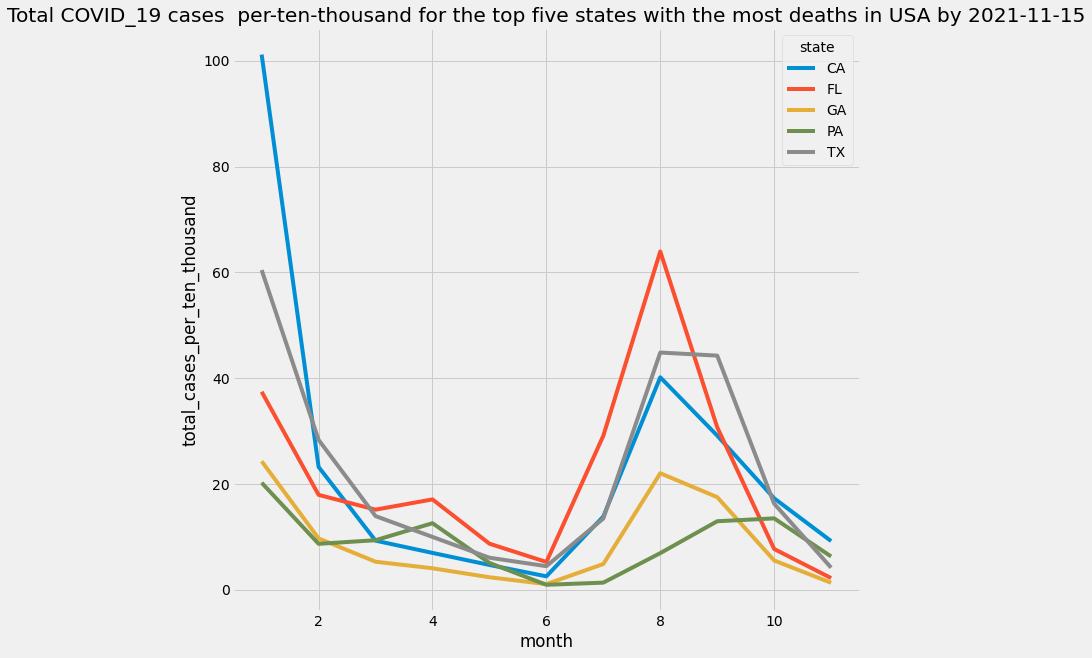

In [46]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='month',y='total_deaths', hue='state',data=top_5_state_data_2021)
plt.title("Total COVID_19 death  for the top five states with the most deaths in USA by 2021-11-15")
plt.show()

plt.figure(figsize=(10, 10))
sns.lineplot(x='month',y='total_cases_per_ten_thousand', hue='state',data=top_5_state_data_2021)
plt.title("Total COVID_19 cases  per-ten-thousand for the top five states with the most deaths in USA by 2021-11-15")
plt.show()

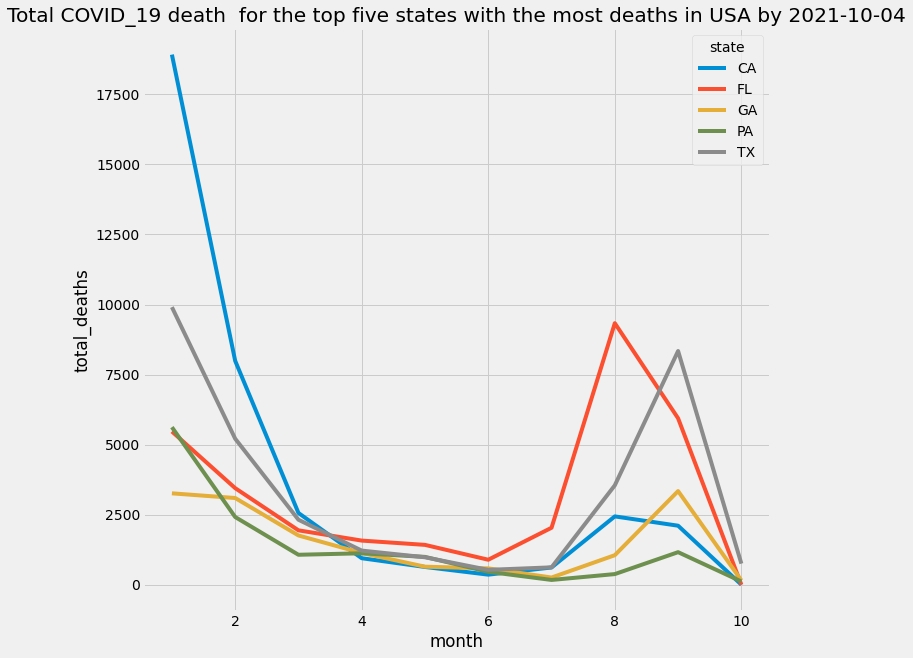

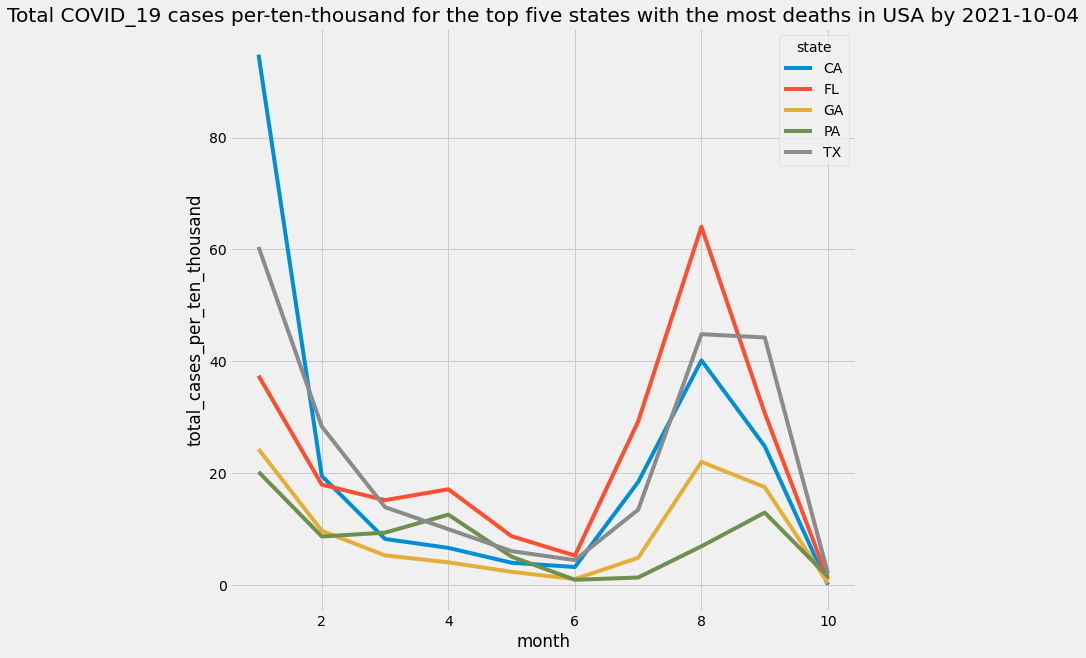

In [ ]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='month',y='total_deaths', hue='state',data=top_5_state_data)
plt.title("Total COVID_19 death  for the top five states with the most deaths in USA by 2021-10-04")
plt.show()

plt.figure(figsize=(10, 10))
sns.lineplot(x='month',y='total_cases_per_ten_thousand', hue='state',data=top_5_state_data)
plt.title("Total COVID_19 cases per-ten-thousand for the top five states with the most deaths in USA by 2021-10-04")
plt.show()



In [10]:
state_month_case_covid_pivoted_2020 = state_month_case_covid_2020.pivot(index='month', columns='state', values='total_cases_per_ten_thousand')
state_month_case_covid_pivoted_2020.head()

state_month_death_covid_pivoted_2020 = state_month_death_covid_2020.pivot(index='month', columns='state', values='total_deaths')


In [9]:
pd.DataFrame(state_month_death_covid_pivoted_2020).to_csv('state_month_death_covid_pivoted_2020.csv')
pd.DataFrame(state_month_case_covid_pivoted_2020).to_csv('state_month_case_covid_pivoted_2020.csv')

NameError: ignored

In [11]:
state_month_case_covid_pivoted_2021 = state_month_case_covid_2021.pivot(index='month', columns='state', values='total_cases_per_ten_thousand')
state_month_case_covid_pivoted_2021.head()

state_month_death_covid_pivoted_2021 = state_month_death_covid_2021.pivot(index='month', columns='state', values='total_deaths')


In [12]:
Sex_age_week_data=Death_ByWeek
Sex_age_week_data.shape #3492,8
Sex_age_week_data['Sex'].unique()

filter=Sex_age_week_data['Sex']=='All Sex'

#Sex_age_week_data[filter]['COVID-19 Deaths'].sum() #total 415752
temp=Sex_age_week_data[filter]
#temp['Age Group'].unique()
filter=temp['Age Group']=='All Ages'
total_death=temp[filter]['COVID-19 Deaths'].sum() #756961

In [13]:
total_death

756961

In [16]:
Sex_age_week_data
#Sex_age_state_data

Data as of          State  ...  Total Deaths COVID-19 Deaths
0     11/10/2021  United States  ...         60147               0
1     11/10/2021  United States  ...           402               0
2     11/10/2021  United States  ...            79               0
3     11/10/2021  United States  ...            99               0
4     11/10/2021  United States  ...           605               0
...          ...            ...  ...           ...             ...
3487  11/10/2021  United States  ...           241              44
3488  11/10/2021  United States  ...           737              92
3489  11/10/2021  United States  ...          1302             124
3490  11/10/2021  United States  ...          1986             151
3491  11/10/2021  United States  ...          3253             202

[3492 rows x 8 columns]

In [14]:
#11/15/21
#Sex_age_state_data=pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')
Sex_age_state_data=Death_By_Sex_Age
#Sex_age_week_data=pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_Week.csv')
Sex_age_week_data=Death_ByWeek
#Sex_age_week_data.dropna()
#United_States_Covid.dropna()
#Sex_age_state_data.dropna()

In [15]:

Sex_age_week_data['year']=pd.DatetimeIndex(Sex_age_week_data['End Week']).year
week_age_sex_data=Sex_age_week_data.groupby(['MMWR Week','Age Group','Sex','year']).sum()
temp=pd.DataFrame(week_age_sex_data)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(week_age_sex_data.values)],axis=1).reindex(temp.index)
temp.columns=['week','age_group','Sex','year','total_deaths','covid-19_deaths']
week_age_sex_covid_data=temp
week_age_sex_covid_data


filter=week_age_sex_covid_data['Sex'].values != 'All Sex'

#week_age_sex_covid_data=week_age_sex_covid_data[filter]

week_age_sex_covid_data=week_age_sex_covid_data[filter]

week_age_sex_covid_data['sex_index']=(week_age_sex_covid_data['Sex']=='Female')*1

week_age_sex_covid_data_F=week_age_sex_covid_data[week_age_sex_covid_data['Sex']=='Female']
week_age_sex_covid_data_M=week_age_sex_covid_data[week_age_sex_covid_data['Sex']=='Male']
Y=2021
week_age_sex_covid_data_F_2021=week_age_sex_covid_data_F[week_age_sex_covid_data_F['year']==Y]
week_age_sex_covid_data_M_2021=week_age_sex_covid_data_M[week_age_sex_covid_data_M['year']==Y]
week_age_sex_covid_data_pivoted_F_2021 = week_age_sex_covid_data_F_2021.pivot(index='week', columns='age_group', values='covid-19_deaths')
weeks_2021=week_age_sex_covid_data_pivoted_F_2021.index

week_age_sex_covid_data_pivoted_M_2021 = week_age_sex_covid_data_M_2021.pivot(index='week', columns='age_group', values='covid-19_deaths')
age_group_name=week_age_sex_covid_data_pivoted_M_2021.iloc[0,].index.tolist()

Y=2020
week_age_sex_covid_data_F_2020=week_age_sex_covid_data_F[week_age_sex_covid_data_F['year']==Y]
week_age_sex_covid_data_M_2020=week_age_sex_covid_data_M[week_age_sex_covid_data_M['year']==Y]
week_age_sex_covid_data_pivoted_F_2020 = week_age_sex_covid_data_F_2020.pivot(index='week', columns='age_group', values='covid-19_deaths')
weeks_2020=week_age_sex_covid_data_pivoted_F_2020.index

week_age_sex_covid_data_pivoted_M_2020 = week_age_sex_covid_data_M_2020.pivot(index='week', columns='age_group', values='covid-19_deaths')
age_group_name=week_age_sex_covid_data_pivoted_M_2020.iloc[0,].index.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
week_age_sex_covid_data_M_2020

week          age_group   Sex  ...  total_deaths  covid-19_deaths  sex_index
4        1          1-4 Years  Male  ...            42                0          0
10       1        15-24 Years  Male  ...           445                0          0
16       1        25-34 Years  Male  ...           888                0          0
22       1        35-44 Years  Male  ...          1124                0          0
28       1        45-54 Years  Male  ...          2018                0          0
...    ...                ...   ...  ...           ...              ...        ...
3443    52        65-74 Years  Male  ...         10047             3083          0
3446    52        75-84 Years  Male  ...         11351             3755          0
3449    52  85 Years and Over  Male  ...         10410             3239          0
3452    52           All Ages  Male  ...         44615            12736          0
3455    52       Under 1 year  Male  ...           201                2          0

[624 rows x 7 columns]

In [21]:
filter=week_age_sex_covid_data_M_2020['age_group']=='All Ages'
total_death=week_age_sex_covid_data_M_2020[filter]['covid-19_deaths'].sum() #199487
total_death

199487

In [22]:
filter=week_age_sex_covid_data_F_2020['age_group']=='All Ages'
total_death=week_age_sex_covid_data_F_2020[filter]['covid-19_deaths'].sum() #168097
total_death

168097

In [23]:
filter=week_age_sex_covid_data_M_2021['age_group']=='All Ages'
total_death=week_age_sex_covid_data_M_2021[filter]['covid-19_deaths'].sum() #218105
total_death

218105

In [24]:
filter=week_age_sex_covid_data_F_2021['age_group']=='All Ages'
total_death=week_age_sex_covid_data_F_2021[filter]['covid-19_deaths'].sum() #171272
total_death

171272

In [19]:

week_age_sex_covid_data_pivoted_F_2020
over_50

Index(['25-34 Years', '35-44 Years', '45-54 Years', '55-64 Years',
       '65-74 Years', '75-84 Years', '85 Years and Over', 'All Ages'],
      dtype='object', name='age_group')

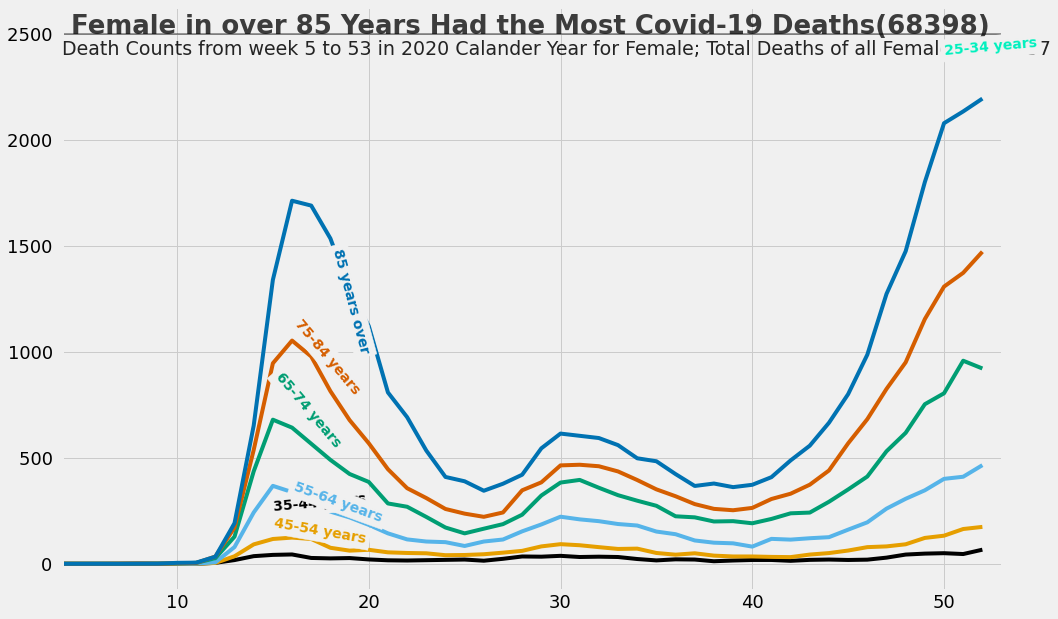

In [40]:

#week_age_sex_covid_data_pivoted_M[age_group_name]
weeks=week_age_sex_covid_data_pivoted_F_2020.index.tolist()
week_age_sex_covid_data_pivoted_F_2020['week']=weeks
over_50=week_age_sex_covid_data_pivoted_F_2020.loc[15,week_age_sex_covid_data_pivoted_F_2020.iloc[15] >50].index
over_50=over_50[:-1]
over_50

# Colorblind-friendly color
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255], [0,240/255,190/255]]
covid_plot=week_age_sex_covid_data_pivoted_F_2020.plot(x='week', y=over_50, figsize=(15,10),color=colors, legend=False)
covid_plot.axhline(y=5000, alpha=0.5, linewidth=1.5,color='black')
covid_plot.tick_params(axis='both',which='major',labelsize=18)
covid_plot.set_xlim(left=4, right=53)
covid_plot.set_yticklabels(labels=['-400','0 ' ,'500 ', '1000 ', '1500 ', '2000 ','2500 ','3000'])
style.use('fivethirtyeight')
# Adding a signature bar
covid_plot.xaxis.label.set_visible(False)

#covid_plot.text(x=4,
#              y=-600,
#              s="""Lihua Yao © CS06 Data Viz with Python; """
#                + """Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W""",
#              fontsize=17,
#              color='#f0f0f0',
#              backgroundcolor='grey'
#              )
#
covid_plot.text(x = 4, y = 5000, s = " Female in over 85 Years Had the Most Covid-19 Deaths(68398)",
              fontsize = 26, weight = 'bold', alpha = 0.75)
covid_plot.text(x = 4, y = 4800,
              s = 'Death Counts from week 5 to 53 in 2020 Calander Year for Female; Total Deaths of all Female is 168097',
              fontsize = 19, alpha = .85)

covid_plot.text(x = 50, y = 4800, s = '25-34 years', color = colors[6], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 500, s = '35-44 years', color = colors[0], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 200, s = '45-54 years', color = colors[1], weight = 'bold', rotation = -10,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 16, y = 400, s = '55-64 years', color = colors[2], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 1100, s = '65-74 years', color = colors[3], weight = 'bold', rotation = -50,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 16, y =1600, s = '75-84 years', color = colors[4], weight = 'bold', rotation = -50,
              backgroundcolor = '#f0f0f0')

covid_plot.text(x = 18, y = 2000, s = '85 years over', color = colors[5], weight = 'bold', rotation = -75,
              backgroundcolor = '#f0f0f0')
plt.show()


In [46]:
over_50

Index(['25-34 Years', '35-44 Years', '45-54 Years', '55-64 Years',
       '65-74 Years', '75-84 Years', '85 Years and Over'],
      dtype='object', name='age_group')

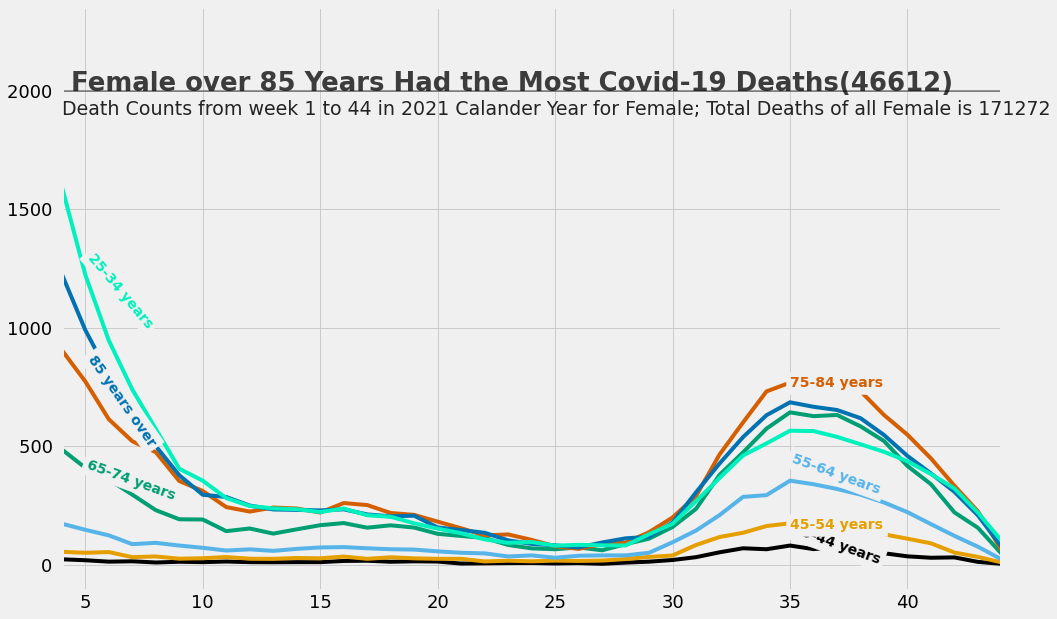

In [21]:
#week_age_sex_covid_data_pivoted_M[age_group_name]
weeks=week_age_sex_covid_data_pivoted_F_2021.index.tolist()
week_age_sex_covid_data_pivoted_F_2021['week']=weeks
over_50=week_age_sex_covid_data_pivoted_F_2021.loc[1,week_age_sex_covid_data_pivoted_F_2021.iloc[1] >50].index
over_50=over_50[:-1]
over_50

# Colorblind-friendly color
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255], [0,240/255,190/255]]
covid_plot=week_age_sex_covid_data_pivoted_F_2021.plot(x='week', y=over_50, figsize=(15,10),color=colors, legend=False)
covid_plot.axhline(y=4000, alpha=0.5, linewidth=1.5,color='black')
covid_plot.tick_params(axis='both',which='major',labelsize=18)
covid_plot.set_xlim(left=4, right=44)
covid_plot.set_yticklabels(labels=['-400','0 ' ,'500 ', '1000 ', '1500 ', '2000 ','2500 ','3000'])
style.use('fivethirtyeight')
# Adding a signature bar
covid_plot.xaxis.label.set_visible(False)

#covid_plot.text(x=4,
#              y=-600,
#              s="""Lihua Yao © CS06 Data Viz with Python; """
#                + """Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W""",
#              fontsize=17,
#              color='#f0f0f0',
#              backgroundcolor='grey'
#              )
#
covid_plot.text(x = 4, y = 4000, s = " Female over 85 Years Had the Most Covid-19 Deaths(46612)",
              fontsize = 26, weight = 'bold', alpha = 0.75)
covid_plot.text(x = 4, y = 3800,
              s = 'Death Counts from week 1 to 44 in 2021 Calander Year for Female; Total Deaths of all Female is 171272',
              fontsize = 19, alpha = .85)

covid_plot.text(x = 5, y = 2000, s = '25-34 years', color = colors[6], weight = 'bold', rotation = -50,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 35, y = 5, s = '35-44 years', color = colors[0], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 35, y = 300, s = '45-54 years', color = colors[1], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 35, y = 600, s = '55-64 years', color = colors[2], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 5, y = 550, s = '65-74 years', color = colors[3], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 35, y =1500, s = '75-84 years', color = colors[4], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')

covid_plot.text(x = 5, y = 1000, s = '85 years over', color = colors[5], weight = 'bold', rotation = -55,
              backgroundcolor = '#f0f0f0')
plt.show()


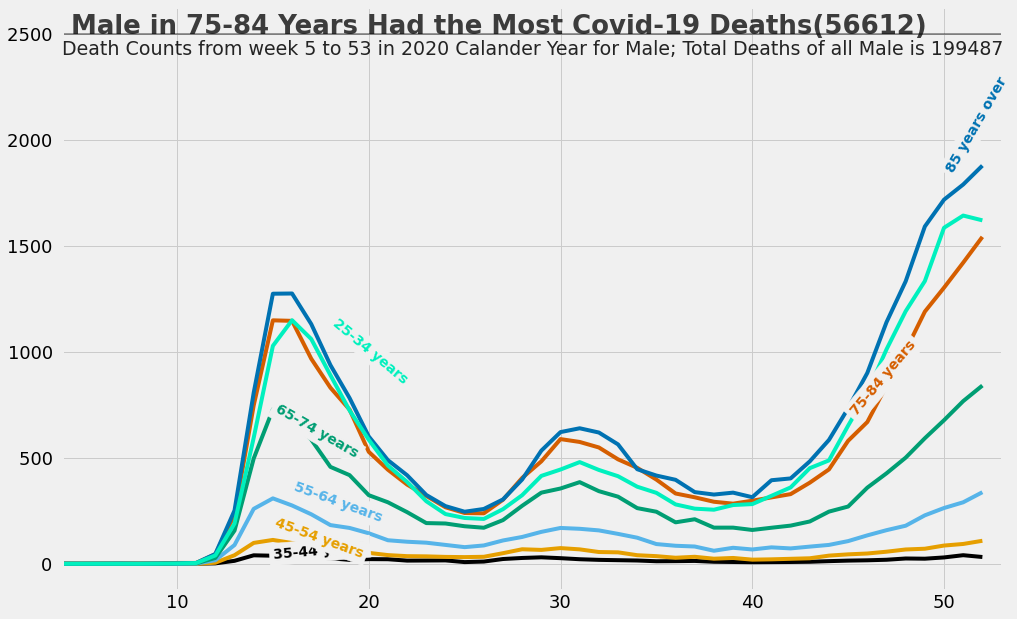

In [22]:

#week_age_sex_covid_data_pivoted_M[age_group_name]
weeks=week_age_sex_covid_data_pivoted_M_2020.index.tolist()
week_age_sex_covid_data_pivoted_M_2020['week']=weeks
over_50=week_age_sex_covid_data_pivoted_M_2020.loc[15,week_age_sex_covid_data_pivoted_M_2020.iloc[15] >50].index
over_50=over_50[:-1]
over_50

# Colorblind-friendly color
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255], [0,240/255,190/255]]
covid_plot=week_age_sex_covid_data_pivoted_M_2020.plot(x='week', y=over_50, figsize=(15,10),color=colors, legend=False)
covid_plot.axhline(y=5000, alpha=0.5, linewidth=1.5,color='black')
covid_plot.tick_params(axis='both',which='major',labelsize=18)
covid_plot.set_xlim(left=4, right=53)
covid_plot.set_yticklabels(labels=['-400','0 ' ,'500 ', '1000 ', '1500 ', '2000 ','2500 ','3000 ','4000','5000'])
style.use('fivethirtyeight')
# Adding a signature bar
covid_plot.xaxis.label.set_visible(False)

#covid_plot.text(x=4,
#              y=-600,
#              s="""Lihua Yao © CS06 Data Viz with Python; """
#                + """Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W""",
#              fontsize=17,
#              color='#f0f0f0',
#              backgroundcolor='grey'
#              )
#
covid_plot.text(x = 4, y = 5000, s = " Male in 75-84 Years Had the Most Covid-19 Deaths(56612)",
              fontsize = 26, weight = 'bold', alpha = .75)
covid_plot.text(x = 4, y = 4800,
              s = 'Death Counts from week 5 to 53 in 2020 Calander Year for Male; Total Deaths of all Male is 199487',
              fontsize = 19, alpha = .85)

covid_plot.text(x = 18, y = 1700, s = '25-34 years', color = colors[6], weight = 'bold', rotation = -40,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 50, s = '35-44 years', color = colors[0], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 60, s = '45-54 years', color = colors[1], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 16, y = 400, s = '55-64 years', color = colors[2], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 1000, s = '65-74 years', color = colors[3], weight = 'bold', rotation = -30,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 45, y =1400, s = '75-84 years', color = colors[4], weight = 'bold', rotation = 50,
              backgroundcolor = '#f0f0f0')

covid_plot.text(x = 50, y = 3700, s = '85 years over', color = colors[5], weight = 'bold', rotation = 60,
              backgroundcolor = '#f0f0f0')
plt.show()


In [23]:
over_50

Index(['25-34 Years', '35-44 Years', '45-54 Years', '55-64 Years',
       '65-74 Years', '75-84 Years', '85 Years and Over'],
      dtype='object', name='age_group')

In [174]:
colors

[[0, 0, 0],
 [0.9019607843137255, 0.6235294117647059, 0],
 [0.33725490196078434, 0.7058823529411765, 0.9137254901960784],
 [0, 0.6196078431372549, 0.45098039215686275],
 [0.8352941176470589, 0.3686274509803922, 0],
 [0, 0.4470588235294118, 0.6980392156862745],
 [0, 0.9411764705882353, 0.7450980392156863]]

In [ ]:
week_age_sex_covid_data_pivoted_M_2021

In [47]:
week_age_sex_covid_data_pivoted_M_2021['75-84 Years'].sum()#53619
week_age_sex_covid_data_pivoted_M_2021['65-74 Years'].sum()#54610
week_age_sex_covid_data_pivoted_M_2021['85 Years and Over'].sum()#38269
week_age_sex_covid_data_pivoted_M_2021['35-44 Years'].sum()#8277
#week_age_sex_covid_data_pivoted_M_2021['25-34 Years'].sum()#3245

8277

In [49]:
week_age_sex_covid_data_pivoted_M_2020['75-84 Years'].sum()#56612
week_age_sex_covid_data_pivoted_M_2020['65-74 Years'].sum()#48073
week_age_sex_covid_data_pivoted_M_2020['85 Years and Over'].sum()#48708
week_age_sex_covid_data_pivoted_M_2020['35-44 Years'].sum()#4321
week_age_sex_covid_data_pivoted_M_2020['25-34 Years'].sum()#1601

1601

In [52]:
week_age_sex_covid_data_pivoted_F_2021['75-84 Years'].sum()#41618
week_age_sex_covid_data_pivoted_F_2021['65-74 Years'].sum()#38288
week_age_sex_covid_data_pivoted_F_2021['85 Years and Over'].sum()#46612
week_age_sex_covid_data_pivoted_F_2021['35-44 Years'].sum()#5227
week_age_sex_covid_data_pivoted_F_2021['25-34 Years'].sum()#2127

2127

In [36]:
week_age_sex_covid_data_pivoted_F_2020['75-84 Years'].sum()#44625
week_age_sex_covid_data_pivoted_F_2020['65-74 Years'].sum()#10348
week_age_sex_covid_data_pivoted_F_2020['85 Years and Over'].sum()#68398
week_age_sex_covid_data_pivoted_F_2020['35-44 Years'].sum()#2180
week_age_sex_covid_data_pivoted_F_2020['25-34 Years'].sum()#915

915

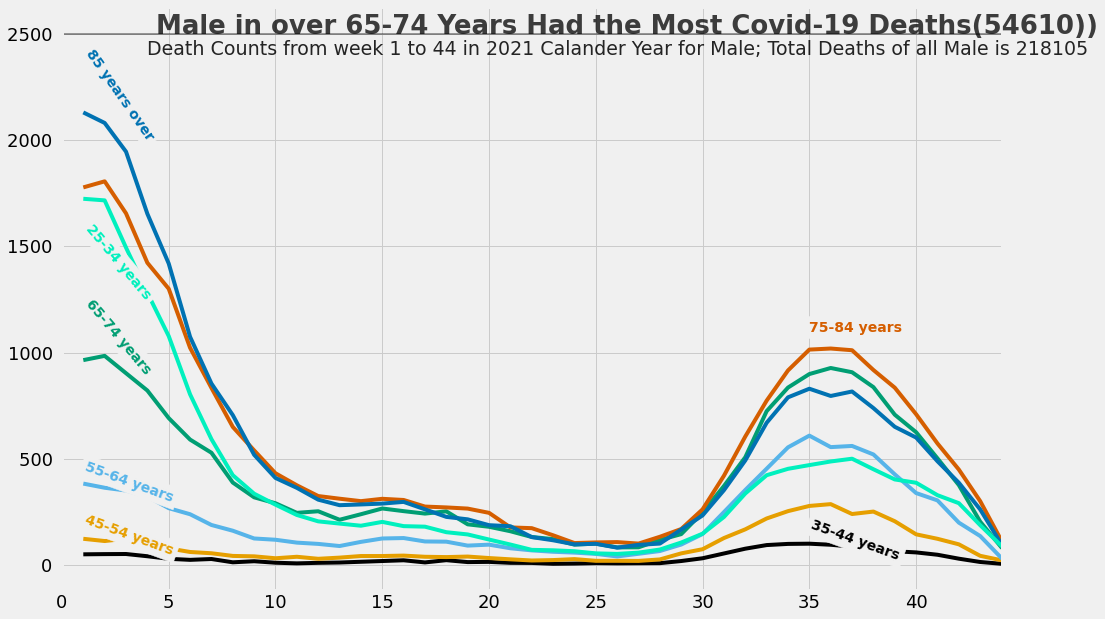

In [48]:


#week_age_sex_covid_data_pivoted_M[age_group_name]
weeks=week_age_sex_covid_data_pivoted_M_2021.index.tolist()
week_age_sex_covid_data_pivoted_M_2021['week']=weeks
over_50=week_age_sex_covid_data_pivoted_M_2021.loc[1,week_age_sex_covid_data_pivoted_M_2021.iloc[1] >50].index
over_50=over_50[:-1]
over_50

# Colorblind-friendly color
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255], [0,240/255,190/255]]
covid_plot=week_age_sex_covid_data_pivoted_M_2021.plot(x='week', y=over_50, figsize=(15,10),color=colors, legend=False)
covid_plot.axhline(y=5000, alpha=0.5, linewidth=1.5,color='black')
covid_plot.tick_params(axis='both',which='major',labelsize=18)
covid_plot.set_xlim(left=0, right=44)
covid_plot.set_yticklabels(labels=['-400','0 ' ,'500 ', '1000 ', '1500 ', '2000 ','2500 ','3000 ','4000','5000'])
style.use('fivethirtyeight')
# Adding a signature bar
covid_plot.xaxis.label.set_visible(False)

#covid_plot.text(x=4,
#              y=-600,
#              s="""Lihua Yao © CS06 Data Viz with Python; """
#                + """Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W""",
#              fontsize=17,
#              color='#f0f0f0',
#              backgroundcolor='grey'
#              )
#
covid_plot.text(x = 4, y = 5000, s = " Male in over 65-74 Years Had the Most Covid-19 Deaths(54610))",
              fontsize = 26, weight = 'bold', alpha = .75)
covid_plot.text(x = 4, y = 4800,
              s = 'Death Counts from week 1 to 44 in 2021 Calander Year for Male; Total Deaths of all Male is 218105',
              fontsize = 19, alpha = .85)

covid_plot.text(x = 1, y = 2500, s = '25-34 years', color = colors[6], weight = 'bold', rotation = -50,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 35, y = 50, s = '35-44 years', color = colors[0], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 1, y = 100, s = '45-54 years', color = colors[1], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 1, y = 600, s = '55-64 years', color = colors[2], weight = 'bold', rotation = -20,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 1, y = 1800, s = '65-74 years', color = colors[3], weight = 'bold', rotation = -50,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 35, y =2200, s = '75-84 years', color = colors[4], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')

covid_plot.text(x = 1, y = 4000, s = '85 years over', color = colors[5], weight = 'bold', rotation = -55,
              backgroundcolor = '#f0f0f0')
plt.show()


In [36]:
United_States_Covid

submission_date state  tot_cases  ...  consent_cases  consent_deaths  year
0          09/01/2021    ND     118491  ...          Agree       Not agree  2021
1          07/14/2020    CA     336447  ...          Agree           Agree  2020
2          02/02/2021    IL    1130917  ...          Agree           Agree  2021
3          09/19/2021    DE     128253  ...          Agree           Agree  2021
4          02/02/2021    MS     280182  ...          Agree           Agree  2021
...               ...   ...        ...  ...            ...             ...   ...
39775      10/12/2020    DC      16022  ...            NaN             NaN  2020
39776      04/13/2020    WY        373  ...          Agree           Agree  2020
39777      07/19/2020    NJ     178541  ...      Not agree           Agree  2020
39778      08/13/2021   FSM          7  ...          Agree           Agree  2021
39779      12/15/2020    DC      25339  ...            NaN             NaN  2020

[39780 rows x 16 columns]

In [ ]:

filter=state_month_case_covid_pivoted.iloc[9] > 5
top_state=state_month_death_covid_pivoted.loc[9,filter].index
top_state
state_month_case_covid
#state_month_death_covid_pivoted.iloc[9]>50

#state_month_case_covid_pivoted[over_50].plot()
#state_month_case_covid_pivoted
state_month_case_covid['total_cases'].sum()#8469976
state_month_death_covid['total_deaths'].sum()#223393
month_case=state_month_case_covid.groupby(['month'])['total_cases'].sum()
month_death=state_month_death_covid.groupby(['month'])['total_deaths'].sum()
month_case.values
month_death=pd.DataFrame(month_death)
month_case=pd.DataFrame(month_case)
month_case['cases_per_ten_thosand']=month_case['total_cases']/10000
month_death['death_per_ten_thosand']=month_death['total_deaths']/10000
state_month_case_covid
figsize=(15,15)
sns.lineplot(x='month', y='cases_per_ten_thosand',color='blue',data=month_case)
sns.lineplot(x='month', y='death_per_ten_thosand',color='red',data=month_death)

#sns.lineplot(x='month', y='total_cases',color='blue',data=month_case)
#sns.lineplot(x='month', y='total_deaths',color='red',data=month_death)
plt.title('USA COVID-19 Cases and Deaths By Month')
plt.show()


style.use('fivethirtyeight')

In [ ]:
state_month_case_covid['total_cases'].sum()#23 day=8469976, 26 day=8469976
state_month_death_covid['total_deaths'].sum()#23 day=223393, 26day=2224601
[224601-223393, 8617022-8469976,224601/8617022 ]

8617022

224601

[1208, 147046, 0.02606480521925092]

Index(['CA', 'FL', 'GA', 'IL', 'MO', 'NC', 'TN'], dtype='object', name='state')

(1.0, 12.0)

[Text(0, 0, '-5'),
 Text(0, 0, '0 '),
 Text(0, 0, '5 '),
 Text(0, 0, '10 '),
 Text(0, 0, '15 '),
 Text(0, 0, '20 '),
 Text(0, 0, '25 '),
 Text(0, 0, '30 '),
 Text(0, 0, '40 ')]

Text(1, -5, 'Lihua Yao © CS06 Data Viz with Python                                                                     Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W/vsak-wrfus')

Text(3, 43, 'COVID-19 Cases_per_ten thousands')

Text(3, 41, 'For States with more than 500 deaths: Total Deaths of all Gender is 207876')

Text(3, 5, 'CA')

Text(3, 5, 'FL')

Text(3, 10, 'GA')

Text(3, 20, 'IL')

Text(3, 20, 'MO')

Text(3, 10, 'NC')

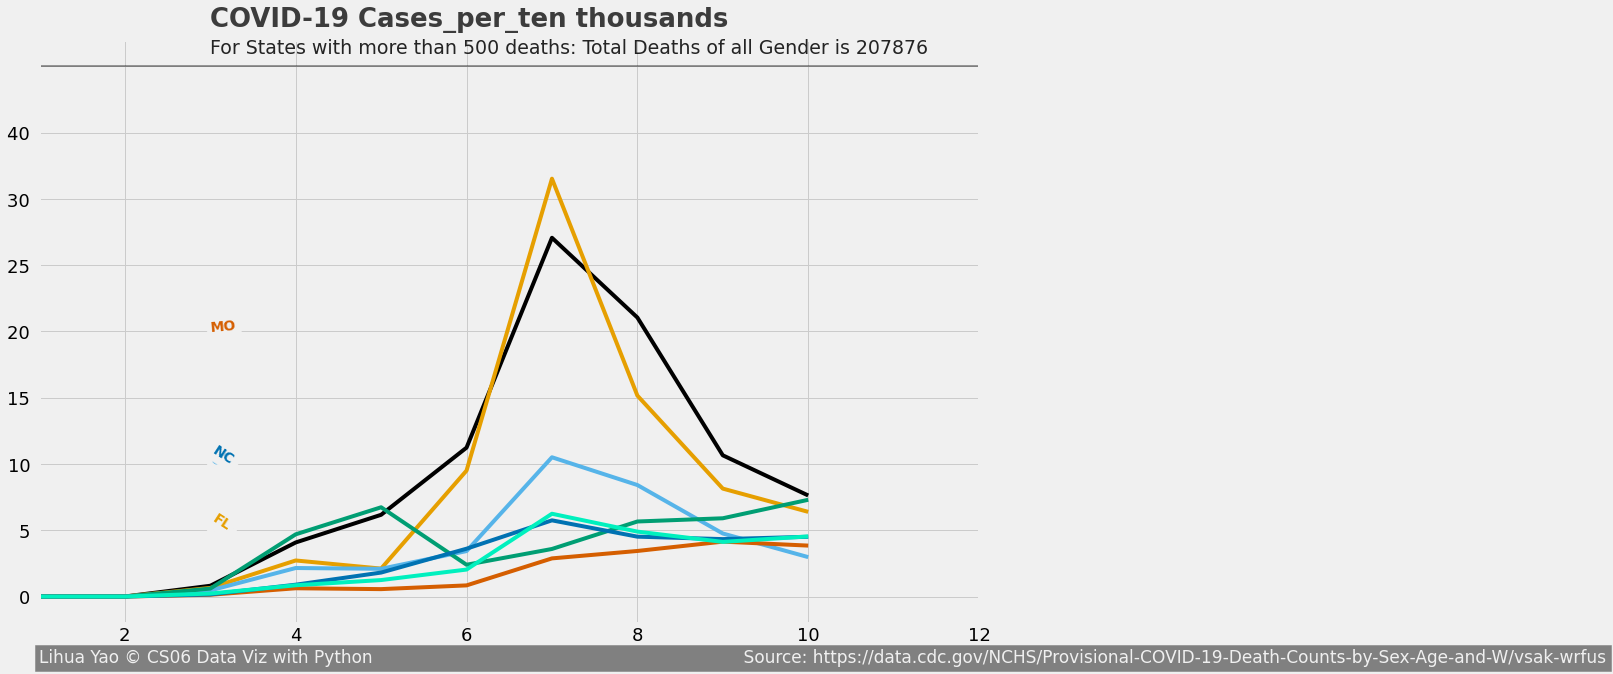

In [ ]:

#week_age_sex_covid_data_pivoted_M[age_group_name]
months=state_month_death_covid_pivoted.index.tolist()
state_month_death_covid_pivoted['month']=months
state_month_case_covid_pivoted['month']=months
over_50=state_month_death_covid_pivoted.loc[9,state_month_death_covid_pivoted.iloc[9] >500].index
over_50=over_50[:-1]
over_50

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255], [0,240/255,190/255]]
covid_plot=state_month_case_covid_pivoted.plot(x='month', y=over_50, figsize=(15,10),color=colors, legend=False)
covid_plot.axhline(y=40, alpha=0.5, linewidth=1.5,color='black')
covid_plot.tick_params(axis='both',which='major',labelsize=18)
covid_plot.set_xlim(left=1, right=12)
covid_plot.set_yticklabels(labels=['-5','0 ' ,'5 ', '10 ', '15 ', '20 ','25 ', '30 ','40 '])
style.use('fivethirtyeight')
# Adding a signature bar
covid_plot.xaxis.label.set_visible(False)

covid_plot.text(x=1,
              y=-5,
              s="""Lihua Yao © CS06 Data Viz with Python             """
                + """                                                        """
                + """Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W/vsak-wrfus""",
              fontsize=17,
              color='#f0f0f0',
              backgroundcolor='grey'
              )

covid_plot.text(x = 3, y = 43, s = "COVID-19 Cases_per_ten thousands",
              fontsize = 26, weight = 'bold', alpha = .75)
covid_plot.text(x = 3, y = 41,
              s = 'For States with more than 500 deaths: Total Deaths of all Gender is 207876',
              fontsize = 19, alpha = .85)


covid_plot.text(x = 3, y = 5, s = 'CA', color = colors[0], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 5, s = 'FL', color = colors[1], weight = 'bold', rotation = -33,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 10, s = 'GA', color = colors[2], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 20, s = 'IL', color = colors[3], weight = 'bold', rotation = -33,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 20, s = 'MO', color = colors[4], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 10, s = 'NC', color = colors[5], weight = 'bold', rotation = -33,
              backgroundcolor = '#f0f0f0')



In [ ]:
Weekly_Death_data['month']=pd.DatetimeIndex(Weekly_Death_data['Week Ending Date']).month
#Weekly_Death_data['month']=pd.DatetimeIndex(Weekly_Death_data['Week Ending Date']).year
State_name=Weekly_Death_data['Jurisdiction'].unique()
len(State_name) #54 state

State_death= Weekly_Death_data.groupby(['Jurisdiction','Year'])['Number of Deaths'].sum()
#define total death for each state 

temp=pd.DataFrame(State_death)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(State_death.values)],axis=1).reindex(temp.index)
temp.columns=['State','Year','total_deaths']
state_year_deaths=temp
state_year_deaths

54

State  Year  total_deaths
0    Alabama  2015  77032.0     
1    Alabama  2016  79430.0     
..       ...   ...      ...     
322  Wyoming  2019  2810.0      
323  Wyoming  2020  2356.0      

[324 rows x 3 columns]

In [ ]:
# Deisease by year and by causes
Disease_causes=Weekly_Death_data['Cause Group'].unique()
#Disease_causes
#for i, dis in enumerate(Disease_causes):
#  print(dis)
#
State_death_cause= Weekly_Death_data.groupby(['Jurisdiction','Year','Cause Group'])['Number of Deaths'].sum()
#define total death for each state 
temp
temp=pd.DataFrame(State_death_cause)
temp=pd.DataFrame(temp.index.tolist())
temp
temp=pd.concat([temp,pd.DataFrame(State_death_cause.values)],axis=1).reindex(temp.index)
temp.columns=['State','Year','Cause_group','total_deaths']
state_year_deaths_cause=temp
state_year_deaths_cause  

State  Year  total_deaths
0    Alabama  2015  77032.0     
1    Alabama  2016  79430.0     
..       ...   ...      ...     
322  Wyoming  2019  2810.0      
323  Wyoming  2020  2356.0      

[324 rows x 3 columns]

0     1                                         2
0     Alabama  2015  Alzheimer disease and dementia          
1     Alabama  2015  Cerebrovascular diseases                
...       ...   ...                       ...                
3773  Wyoming  2020  Malignant neoplasms                     
3774  Wyoming  2020  Other diseases of the circulatory system

[3775 rows x 3 columns]

State  Year                               Cause_group  total_deaths
0     Alabama  2015  Alzheimer disease and dementia            8556.0      
1     Alabama  2015  Cerebrovascular diseases                  5512.0      
...       ...   ...                       ...                     ...      
3773  Wyoming  2020  Malignant neoplasms                       1382.0      
3774  Wyoming  2020  Other diseases of the circulatory system  48.0        

[3775 rows x 4 columns]

In [ ]:
#COVID_19
USAStateABV_data=pd.read_csv('USAStateABV.csv')

#state_covid_cases=pd.DataFrame(state_cases_sum)

state_covid_deaths=pd.DataFrame(state_deaths_sum)
state_covid_deaths['Code']=state_covid_deaths.index
state_covid_deaths_sorted=state_covid_deaths.sort_values(by='Code')
#state_covid_deaths_sorted
USAStateABV_data_sorted=USAStateABV_data.sort_values(by='Code')
state_covid_deaths_sorted=pd.merge(state_covid_deaths_sorted,USAStateABV_data_sorted,how='right')
state_covid_deaths_sorted=state_covid_deaths_sorted.sort_values(by='State')
state_names=state_covid_deaths_sorted['State'].unique()
len(state_names)

filter=state_year_deaths_cause['State'].apply(lambda x: True if x in state_names else False)
filter
state_year_deaths_cause[filter]
#state_year_deaths_sorted=state_year_deaths.sort_values(by="State")
#state_year_deaths_sorted=pd.merge(state_year_deaths_sorted,USAStateABV_data_sorted,how='inner')
state_year_deaths_cause_sorted=state_year_deaths_cause[filter]
len(state_covid_deaths_sorted['new_death'].values)#51
len(state_year_deaths_cause_sorted['State'].unique())

51

0       True
1       True
        ... 
3773    True
3774    True
Name: State, Length: 3775, dtype: bool

State  Year                               Cause_group  total_deaths
0     Alabama  2015  Alzheimer disease and dementia            8556.0      
1     Alabama  2015  Cerebrovascular diseases                  5512.0      
...       ...   ...                       ...                     ...      
3773  Wyoming  2020  Malignant neoplasms                       1382.0      
3774  Wyoming  2020  Other diseases of the circulatory system  48.0        

[3541 rows x 4 columns]

51

51

In [ ]:
Disease_causes=Weekly_Death_data['Cause Group'].unique()
Disease_causes
for i, dis in enumerate(Disease_causes):
  print(dis)
  


array(['Alzheimer disease and dementia', 'Cerebrovascular diseases', 'Heart failure', 'Hypertensive diseases', 'Ischemic heart disease', 'Other diseases of the circulatory system', 'Malignant neoplasms', 'Diabetes', 'Renal failure', 'Sepsis', 'Chronic lower respiratory disease', 'Influenza and pneumonia', 'Other diseases of the respiratory system'], dtype=object)

Alzheimer disease and dementia
Cerebrovascular diseases
Heart failure
Hypertensive diseases
Ischemic heart disease
Other diseases of the circulatory system
Malignant neoplasms
Diabetes
Renal failure
Sepsis
Chronic lower respiratory disease
Influenza and pneumonia
Other diseases of the respiratory system


array([  2419.,   2808.,   2870.,   3030.,   3226.,   3234.,   6217.,   6514.,   6940.,   7078.,   7566.,   7712.,   7788.,   8792.,   8806.,   9226.,   9350.,   9390.,   9495.,  11254.,  11888.,  12221.,  12322.,  12592.,  12610.,  13604.,  13970.,  14430.,  15294.,  16055.,  16462.,  17654.,  18102.,  19046.,  19148.,  19255.,  19260.,  19646.,  19854.,  21098.,  21138.,  23342.,  23836.,  24438.,  25501.,  26198.,  27234.,  27258.,  27282.,  27340.,  27692.,  27806.,  27812.,  28418.,  28838.,  30130.,  31224.,  32696.,  32974.,  33634.,  41594.,  47068.,  47864.,  49902.,  50250.,  51334.,  55093.,  73288.,  75344.,  75778.,  76726.,  77474.,  86875., 118976., 119264., 119298., 119428., 120352.])

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Total death in California grouped by the Cause without COVID_19 data by 2020-10-6')

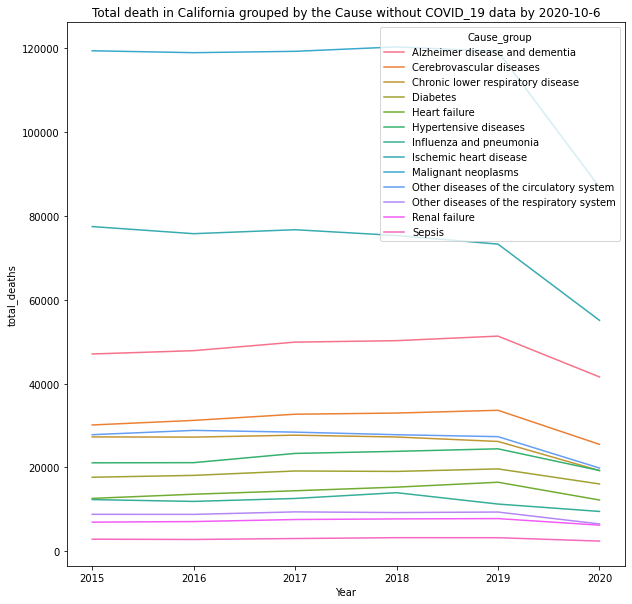

In [ ]:
filter=state_year_deaths_cause_sorted['State']=='California'
CA_dat=state_year_deaths_cause_sorted[filter]
np.sort(CA_dat['total_deaths'])
filter=CA_dat['total_deaths'] >70000
CA_dat_top_death=CA_dat[filter]
#causes_name=state_year_deaths_cause_sorte['Cause_group']

plt.figure(figsize=(10, 10))
sns.lineplot(x='Year',y='total_deaths', hue='Cause_group', data=CA_dat)
plt.title("Total death in California grouped by the Cause without COVID_19 data by 2020-10-6")
plt.show()



In [ ]:
filter=CA_dat['Year']==2019
np.argmax(CA_dat[filter]['total_deaths']) 
np.sort(CA_dat[filter]['total_deaths'])[-1]

filter1=CA_dat[filter]['total_deaths']>20000
CA_dat[filter][filter1]['Cause_group'].values

8

119264.0

array(['Alzheimer disease and dementia', 'Cerebrovascular diseases', 'Chronic lower respiratory disease', 'Hypertensive diseases', 'Ischemic heart disease', 'Malignant neoplasms', 'Other diseases of the circulatory system'], dtype=object)

array([ 3875.,  4657.,  4754.,  4890.,  5011.,  5026.,  5038.,  5112.,  5426.,  5488.,  5670.,  5703.,  6186.,  6224.,  6232.,  6240.,  6304.,  6428.,  6484.,  6517.,  7198.,  7292.,  7412.,  7758.,  7810.,  7838.,  8066.,  8306.,  8480.,  8600., 10837., 10866., 11460., 11638., 11699., 12016., 12358., 12448., 12492., 13218., 14160., 14444., 16221., 17921., 22558., 22590., 22682., 22934., 23042., 23098., 23446., 23520., 24000., 24060., 24176., 24890., 25394., 25594., 26972., 28276., 29133., 31382., 32486., 34434., 34766., 34776., 46009., 58786., 59578., 59688., 60078., 60340., 66637., 87394., 87694., 89750., 90238., 90908.])

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'Total death in Florida grouped by the Cause without COVID_19 data by 2020-10-6')

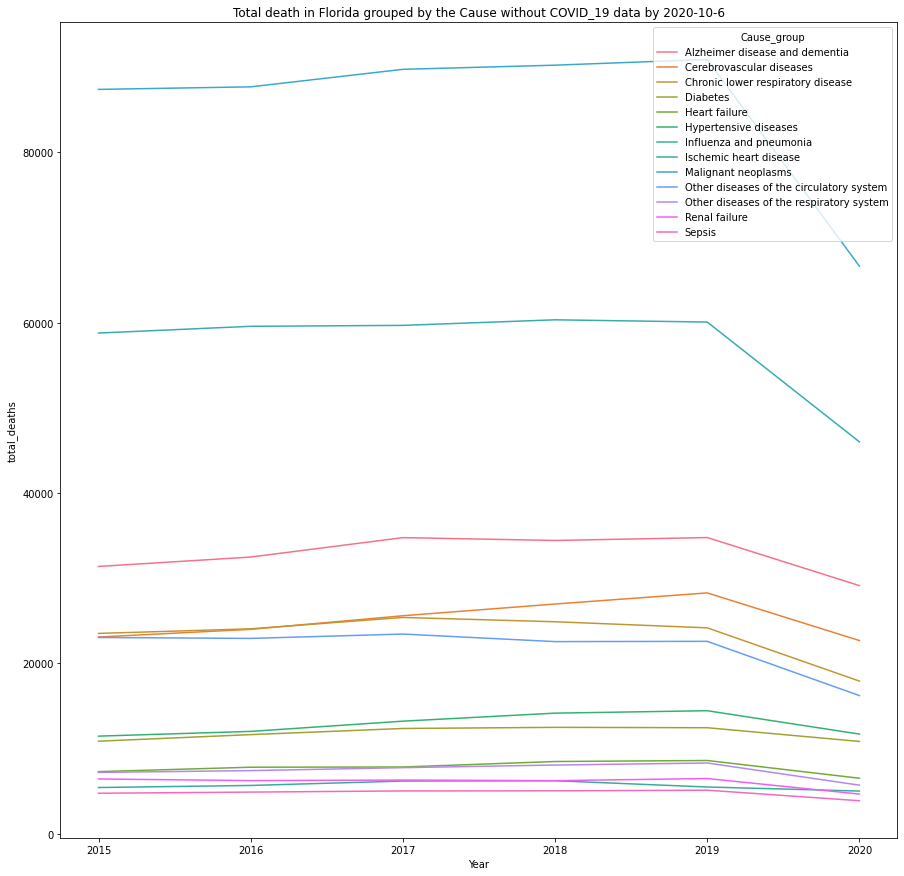

In [ ]:
filter=state_year_deaths_cause_sorted['State']=='Florida'
CA_dat=state_year_deaths_cause_sorted[filter]
np.sort(CA_dat['total_deaths'])
filter=CA_dat['total_deaths'] >70000
CA_dat_top_death=CA_dat[filter]
#causes_name=state_year_deaths_cause_sorte['Cause_group']

plt.figure(figsize=(15, 15))
sns.lineplot(x='Year',y='total_deaths', hue='Cause_group', data=CA_dat)
plt.title("Total death in Florida grouped by the Cause without COVID_19 data by 2020-10-6")
plt.show()

In [ ]:
filter=state_year_deaths_cause_sorted['Year']==2020

temp=state_year_deaths_cause_sorted[filter]
temp['total_deaths_updated']=[int(i) for i in (temp['total_deaths']+state_covid_deaths_cuase_sorted['new_death'].values)/10000]

temp
#state_year_deaths_sorted[filter]['total_deaths_updated']=temp['total_deaths_updated']
filter=state_year_deaths_sorted['Year'] < 2020
temp1=state_year_deaths_sorted[filter]
temp1['total_deaths_updated']=temp1['total_deaths']/10000

state_year_deaths_updated=pd.concat([temp1, temp],axis=0)


state_year_deaths_updated['total_deaths_per_ten_thousand']=state_year_deaths_updated['total_deaths']/10000
state_year_deaths_updated['total_deaths_updated_per_ten__thousand']=state_year_deaths_updated['total_deaths_updated']
state_year_deaths_updated
#%.08f

np.sort(state_covid_deaths_sorted['new_death'])[-15:]

filter=state_covid_deaths_sorted['new_death'] >7000
bad_state=state_covid_deaths_sorted[filter]['State'].unique()
filter=state_year_deaths_updated['State'].apply(lambda x: x in bad_state)

final_15=state_year_deaths_updated[filter]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


State  Year  total_deaths  total_deaths_updated
5    Alabama    2020  62725.0       6                   
11   Alaska     2020  1634.0        0                   
..      ...      ...     ...       ..                   
317  Wisconsin  2020  59336.0       6                   
323  Wyoming    2020  2356.0        0                   

[51 rows x 4 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


State  Year  total_deaths  total_deaths_updated  \
0    Alabama    2015  77032.0       7.70                   
1    Alabama    2016  79430.0       7.94                   
..       ...     ...      ...        ...                   
317  Wisconsin  2020  59336.0       6.00                   
323  Wyoming    2020  2356.0        0.00                   

     total_deaths_per_ten_thousand  total_deaths_updated_per_ten__thousand  
0    7.70                           7.70                                    
1    7.94                           7.94                                    
..    ...                            ...                                    
317  5.93                           6.00                                    
323  0.24                           0.00                                    

[306 rows x 6 columns]

array([ 3973,  4521,  4947,  5592,  5713,  7161,  7229,  8244,  9077,  9085,  9531, 14767, 16111, 16147, 16177])

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Total Deaths  for all causes including COVID_19 in USA by 2020-10-6 for States with at least 7000 COVID_19 Deaths')

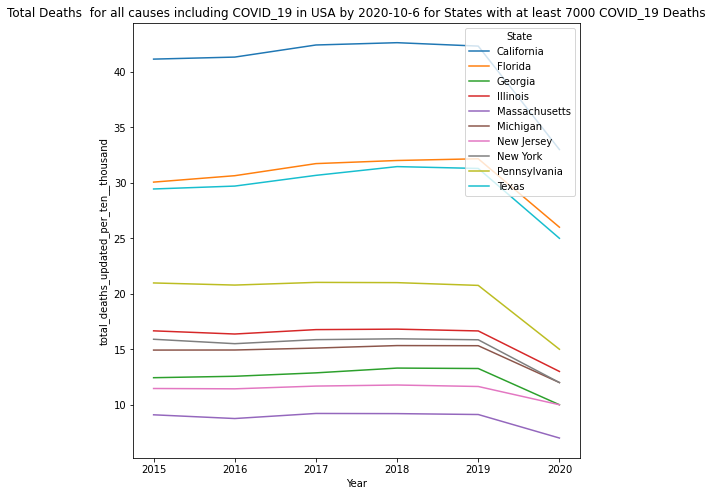

In [ ]:
plt.figure(figsize=(8, 8))
#sns.lineplot(x='Year',y='Covid_Death', hue='State',data=state_year_deaths_2020)
sns.lineplot(x='Year',y='total_deaths_updated_per_ten__thousand', hue='State',data=final_15)
#sns.lineplot(x='Year',y='total_deaths_covid_included_per_ten__thousand', hue='State',data=temp)

plt.title("Total Deaths  for all causes including COVID_19 in USA by 2020-10-6 for States with at least 7000 COVID_19 Deaths")
plt.show()
